# Data preview

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from obspy import Stream
import os
import sys
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

sys.path.insert(0, os.path.abspath('../src'))

import reader

Acquisition channels to read and work with:

In [2]:
channels = ['EHE', 'EHN', 'EHZ']

## Reading

In [3]:
datalist = [(channel, f'2019345_030000_{channel}.msd') for channel in channels]
data = reader.read_data(datalist)

Data must be resorted considering [unexpected times](./unexpected-times.ipynb):

In [4]:
traces = []
for channel in channels:
    st = data[channel]['st']
    tr_main = st[0]

    for tr in st[1:]:
        tr_main.data = np.concatenate((tr_main.data, tr.data))

    traces.append(tr_main)
st = Stream(traces=traces)
st

3 Trace(s) in Stream:
XX.SSI.00.EHE | 2019-12-11T03:00:00.000000Z - 2019-12-11T03:59:54.996000Z | 250.0 Hz, 898750 samples
XX.SSI.00.EHN | 2019-12-11T03:00:00.000000Z - 2019-12-11T03:59:54.996000Z | 250.0 Hz, 898750 samples
XX.SSI.00.EHZ | 2019-12-11T03:00:00.000000Z - 2019-12-11T03:59:54.996000Z | 250.0 Hz, 898750 samples

Correction of data considering factor of 512000 counts/g:

In [5]:
factor = 1 / 512000
for tr in st:
    tr.data = factor * tr.data

## Manipulation

In [6]:
st_detrended = st.copy()
st_detrended.detrend(type='constant');

Decimate from 250 Hz to 25 Hz:

In [7]:
st_decimated = st_detrended.copy()
st_decimated.decimate(10, no_filter=True)

3 Trace(s) in Stream:
XX.SSI.00.EHE | 2019-12-11T03:00:00.000000Z - 2019-12-11T03:59:54.960000Z | 25.0 Hz, 89875 samples
XX.SSI.00.EHN | 2019-12-11T03:00:00.000000Z - 2019-12-11T03:59:54.960000Z | 25.0 Hz, 89875 samples
XX.SSI.00.EHZ | 2019-12-11T03:00:00.000000Z - 2019-12-11T03:59:54.960000Z | 25.0 Hz, 89875 samples

## Plotting

### Raw data

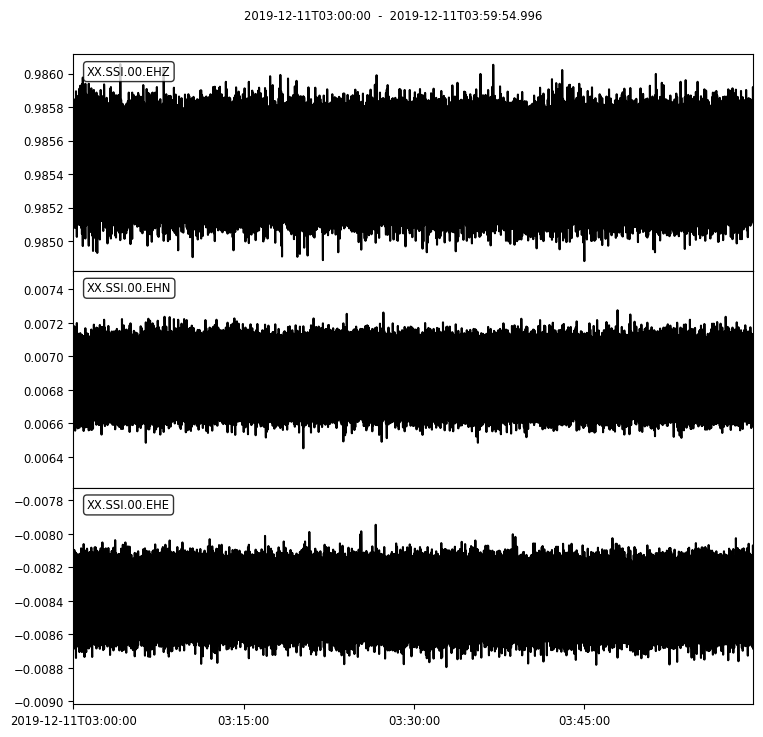

In [8]:
st.plot();

### Manipulated data

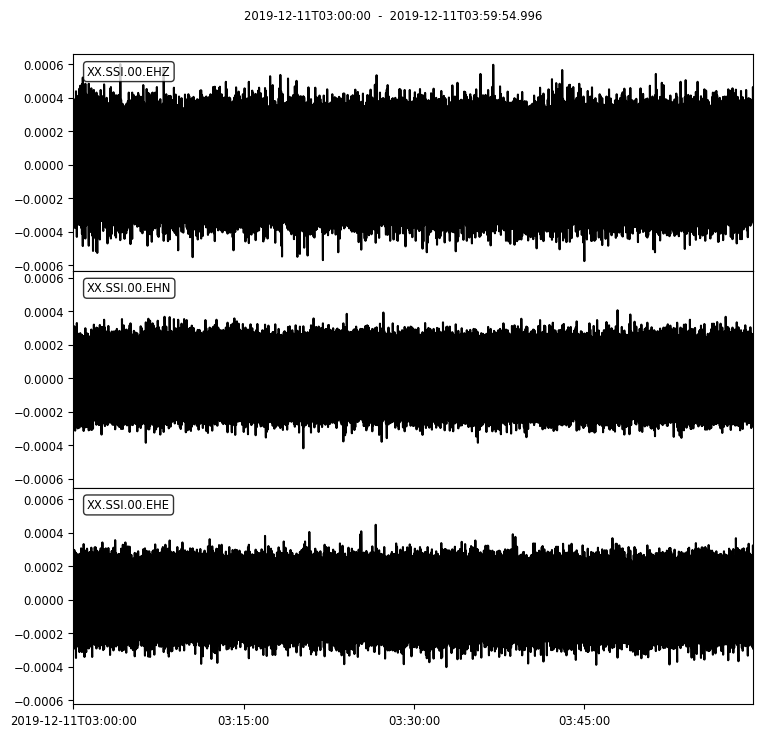

In [9]:
st_detrended.plot();

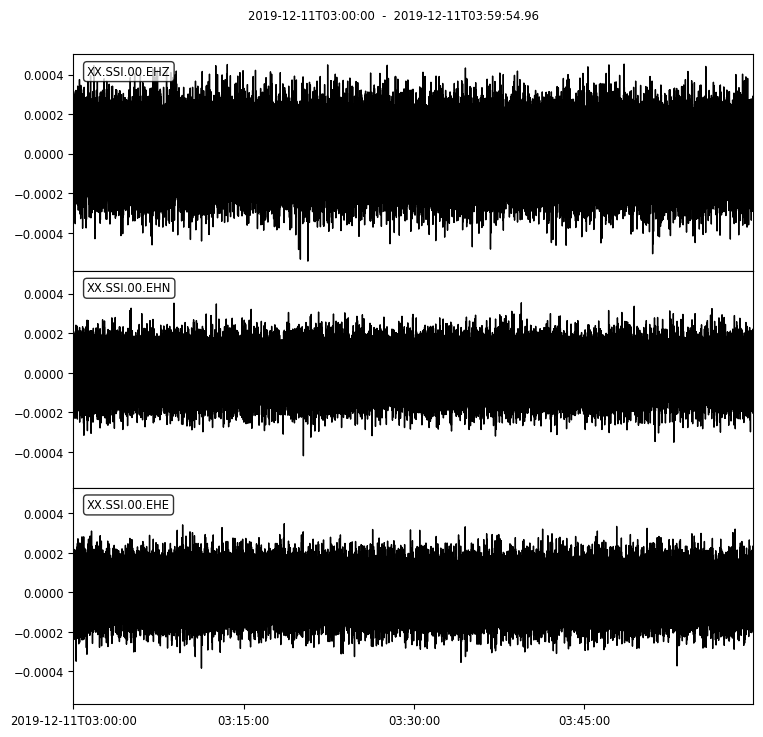

In [10]:
st_decimated.plot();